In [1]:
%reload_ext autoreload
%autoreload 2

from matplotlib import colors as mcolors

colors_list = mcolors.get_named_colors_mapping()
print(len(colors_list))


1163


### Lorentz dispersion

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sin', 'e', 'solve', 'gamma', 'exp', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


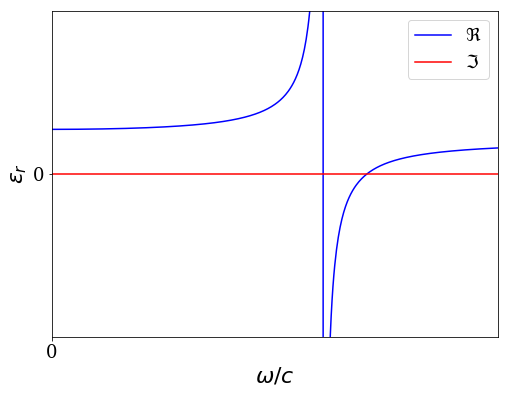

(k_1, w_1) : (5.171732609273045, 3.8)   (k_2, w_2) : (5.5339859052946645, 7.0) 
(dk, dw) : (0.3622532960216196, 3.2)
d_kw :  3.22043901518   phi :  83.4999457221


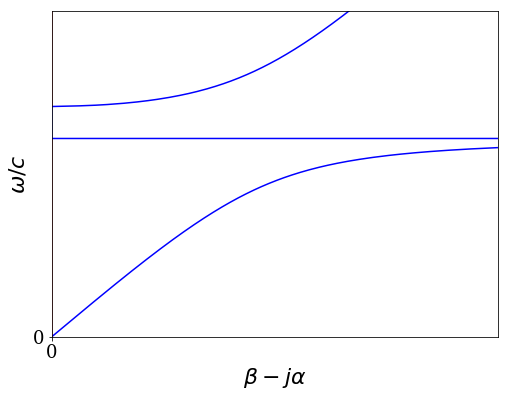

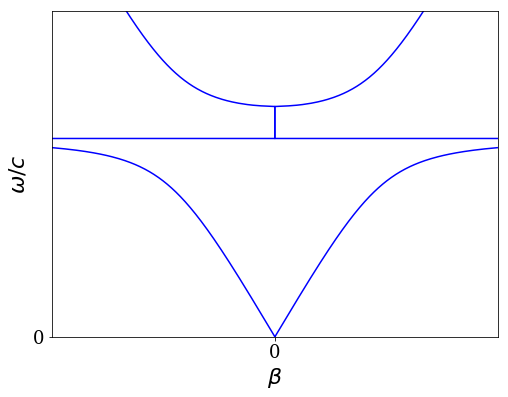

interleaved_range:  [0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, 8, -8, 9, -9, 10, -10, 11, -11, 12, -12, 13, -13, 14, -14, 15, -15, 16, -16, 17, -17, 18, -18, 19, -19, 20, -20]


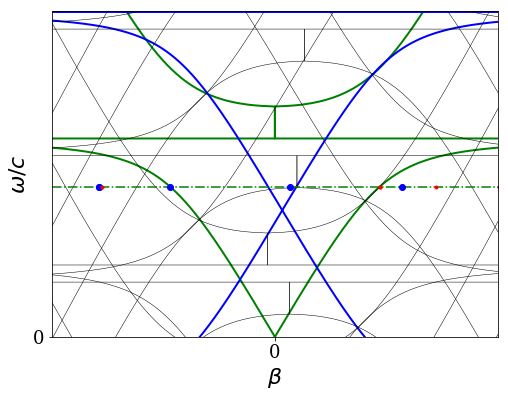

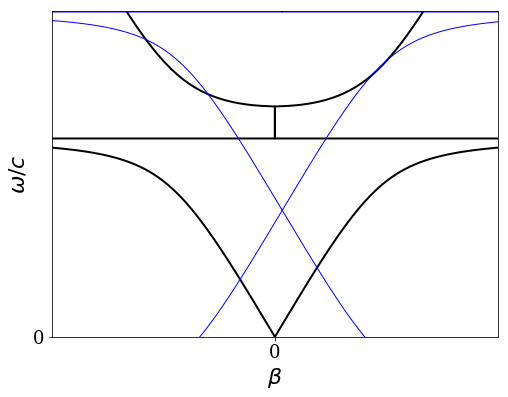

In [16]:
%pylab inline

import numpy as np
from scipy import constants

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_x, fig_y = 8, 6 
figsize(fig_x, fig_y)

c = 1#constants.c
epsilon_0 = 1.0#constants.epsilon_0
gamma_0 = 0.0*c
omega_0_ = 5.0*c
omega_p = 3.0*c/np.sqrt(epsilon_0)
q_e = 1.0
m_e = 1.0
n_e0 = omega_p**2*m_e*epsilon_0/q_e**2

X_ee = lambda omega: (epsilon_0*omega_p**2/(1j*gamma_0*omega - omega**2 + omega_0_**2))

N = 10000
k_max = 11.0
w_max = k_max*c*fig_y/fig_x
w = np.linspace(0.0, 20*w_max, N)

epsilon_r = 1.0 + X_ee(w)

plot(w/c, np.real(epsilon_r), 'b', label=r'$\Re$')
plot(w/c, np.imag(epsilon_r), 'r', label=r'$\Im$')
#xscale('log')
xlim([0, w_max/c])
ylim([-5, 5])
xlabel(r'$\omega/c$', fontsize=22)
ylabel(r'$\epsilon_r$', fontsize=22)
xticks([0])
yticks([0])
legend()

savefig(os.path.join(dir_name, 'lorentz-epsr' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


n_mode = 20

def fun_k_w_p(w, c=1.0):
    k = w/c*np.sqrt(1.0+X_ee(w))
    return k
def fun_k_w_m(w, c=1.0):
    k = -w/c*np.sqrt(1.0+X_ee(w))
    return k

def fun_k_w_n_p(w, n, c=1.0): 
    n *= -np.sign(d_k)
    k_n = fun_k_w_p(w - n*d_w, c=c)
    k = k_n + n*d_k
    return k
def fun_k_w_n_m(w, n, c=1.0):
    n *= np.sign(d_k)
    k_n = fun_k_w_m(w - n*d_w, c=c)
    k = k_n + n*d_k
    return k


w_1 = 3.8*c
w_2 = 7.0*c
k_1r = np.real(fun_k_w_p(w_1))
k_2r = np.real(fun_k_w_p(w_2))
print('(k_1, w_1) : ({}, {})   (k_2, w_2) : ({}, {}) '.format(k_1r, w_1, k_2r, w_2))

d_k = k_2r - k_1r
d_w = w_2 - w_1
#d_w, d_k = d_w/2, d_k/2
d_wc = d_w/c

d_wk_scale = 1.0
d_wc *= d_wk_scale
d_k *= d_wk_scale
d_w *= d_wk_scale

print('(dk, dw) : ({}, {})'.format(d_k, d_w))
print('d_kw : ', np.sqrt(d_k**2+d_w**2), '  phi : ', np.arccos(d_k/d_w)*180/np.pi)

"""
d_kw = 3.52354171563
phi = 20.0200270409/180.0*np.pi
d_k = d_kw*np.cos(phi)
d_wc = d_kw*np.sin(phi)
d_w = d_wc*c
"""

k = w/c*np.sqrt(epsilon_r)
plot(np.real(k), w/c, 'b')
plot(-np.imag(k), w/c, 'r')
#plot([k_1r, k_2r], [w_1/c, w_2/c], 'ko')
xlim(0, k_max)
ylim(0, w_max/c)
ylabel(r'$\omega/c$', fontsize=22)
xlabel(r'$\beta-j\alpha$', fontsize=22)
xticks([0])
yticks([0])

savefig(os.path.join(dir_name, 'lorentz-disp-RI' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


#k = np.ma.masked_where(np.real(k)<1.0e-6, k)
#k = np.ma.masked_where(np.imag(k)<0, k)
#k = np.ma.masked_where(np.logical_and(np.real(k)==0, np.imag(k)<0), k)

i=0
plot(np.real(k+i*d_k), (w+i*d_w)/c, 'b')
plot(np.real(k+i*d_k), (-w+i*d_w)/c, 'b')
plot(np.real(-k+i*d_k), (w+i*d_w)/c, 'b')
plot(np.real(-k+i*d_k), (-w+i*d_w)/c, 'b')
#plot([k_1r, k_2r], [w_1/c, w_2/c], 'ko')
xlim(-k_max, k_max)
ylim(0, w_max/c)
ylabel(r'$\omega/c$', fontsize=22)
xlabel(r'$\beta$', fontsize=22)
xticks([0])
yticks([0])

savefig(os.path.join(dir_name, 'lorentz-disp' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

interleaved_range = [0]
interleaved_range.extend([val for pair in zip(np.arange(1, n_mode+1), -np.arange(1, n_mode+1)) for val in pair])
print('interleaved_range: ', interleaved_range)


for i in interleaved_range:
    lw = 0.5
    _color_ = 'k'#list(colors_list.keys())[i+n_mode]
    ls = '-'
    #if i==-1:
    #    lw = 2
    #    _color_ = 'r'
    #    ls = '-'
    if i==0:
        lw = 2
        _color_ = 'g'
        ls = '-'
    if i==1:
        lw = 2
        _color_ = 'b'
        ls = '-'
    plot(np.real(k+i*d_k), (w+i*d_w)/c, _color_, lw=lw, linestyle=ls)
    plot(np.real(k+i*d_k), (-w+i*d_w)/c, _color_, lw=lw, linestyle=ls)
    plot(np.real(-k+i*d_k), (w+i*d_w)/c, _color_, lw=lw, linestyle=ls)
    plot(np.real(-k+i*d_k), (-w+i*d_w)/c, _color_, lw=lw, linestyle=ls)

#plot(10*np.array([-d_k, d_k]), 10*np.array([-d_w, d_w])/c, color='k', linestyle='-', linewidth=2)
#plot([k_1r, k_2r], [w_1/c, w_2/c], 'ko')

bz = np.array([0.5*d_k, 0.5*d_w/c])
bz_n = 20.0*np.array([-bz[1], bz[0]])  ##normal
#plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
#plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')


if False:
    for i in range(-3, 4):
        k_i = fun_k_w_n_m(w_1, i, c=c)
        plot([np.real(k_i)], [w_1/c], 'go')
        k_i = fun_k_w_n_p(w_1, i, c=c)
        plot([np.real(k_i)], [w_1/c], 'ro')

#axis('equal')
ylabel(r'$\omega/c$', fontsize=22)
xlabel(r'$\beta$', fontsize=22)
xticks([0])
yticks([0])
xlim(-k_max, k_max)
ylim(0, w_max/c)

savefig(os.path.join(dir_name, 'lorentz-disp-Brillouin' + file_ext), bbox_inches='tight', pad_inches=0.2)

if True and 'eig_points_k' in globals():
    axhline(w_i, color='g', linestyle='-.')
    #plot(np.real(eig_points_k), np.real(eig_points_w), 'ro', lw=0.1)
    plot(np.real(eig_points_k_m), np.real(eig_points_w_m), 'bo', lw=0.1, markersize=6)
    plot(np.real(eig_points_k_p), np.real(eig_points_w_p), 'ro', lw=0.1, markersize=3)
    savefig(os.path.join(dir_name, 'lorentz-disp-modes' + file_ext), bbox_inches='tight', pad_inches=0.2)

show()

import matplotlib.animation as animation

animate_periodic = False
ah_len = 0.15*np.sqrt(np.abs(d_k)**2 + np.abs(d_w)**2)
ah_width = 0.7*ah_len
zero_drawn = False
if animate_periodic:
    figsize(7, 7)

    def animate_per(_i_):
        global zero_drawn
        i = interleaved_range[_i_]
        lw = 2
        _color_ = list(colors_list.keys())[i+n_mode]
        if i==0:
            lw = 3
            _color_ = 'k'
        plot(np.real(k+i*d_k), (w+i*d_w)/c, _color_, lw=lw)
        plot(np.real(k+i*d_k), (-w+i*d_w)/c, _color_, lw=lw)
        plot(np.real(-k+i*d_k), (w+i*d_w)/c, _color_, lw=lw)
        plot(np.real(-k+i*d_k), (-w+i*d_w)/c, _color_, lw=lw)
        
        if i==1:
            plot([(bz-bz_n)[0], (bz+bz_n)[0]], [(bz-bz_n)[1], (bz+bz_n)[1]], 'k--')
            plot([(-bz-bz_n)[0], (-bz+bz_n)[0]], [(-bz-bz_n)[1], (-bz+bz_n)[1]], 'k--')
        if i==0:
            gca().arrow(-k_max, 0, 2*k_max, 0, head_width=1.5*ah_width, head_length=2*ah_len, fc='k', ec='k', length_includes_head=True)

        
        if i>0:
            gca().arrow((i-1)*d_k, (i-1)*d_w, d_k, d_w, head_width=ah_width, head_length=ah_len, fc='r', ec='r', length_includes_head=True)
        elif i<0:
            gca().arrow((i+1)*d_k, (i+1)*d_w, -d_k, -d_w, head_width=ah_width, head_length=ah_len, fc='r', ec='r', length_includes_head=True)

        ylabel(r'$\omega$', fontsize=26)
        xlabel(r'$\beta$', fontsize=26)
        xticks([0])
        yticks([0])
        xlim(-k_max, k_max)
        ylim(-w_max/c, w_max/c)
        
        if abs(i)<2:
            if (i==0 and not zero_drawn) or i!=0:
                savefig(os.path.join(dir_name, 'lorentz-anim-{}'.format(i) + file_ext), bbox_inches='tight', pad_inches=0.2)
                zero_drawn = True

    fig = plt.figure()
    axes = plt.gca()
    anim = animation.FuncAnimation(fig, animate_per, frames=len(interleaved_range), interval=1, repeat=False)
    anim.save(os.path.join(dir_name, 'lorentz-anim.gif'), writer="imagemagick", fps=1, dpi=200)

show()


for i in [0, 1]:
    lw = 1
    _color_ = 'b'#list(colors_list.keys())[i+n_mode]
    ls = '-'
    if i==0:
        lw = 2
        _color_ = 'k'
        ls = '-'
    plot(np.real(k+i*d_k), (w+i*d_w)/c, _color_, lw=lw, linestyle=ls)
    plot(np.real(k+i*d_k), (-w+i*d_w)/c, _color_, lw=lw, linestyle=ls)
    plot(np.real(-k+i*d_k), (w+i*d_w)/c, _color_, lw=lw, linestyle=ls)
    plot(np.real(-k+i*d_k), (-w+i*d_w)/c, _color_, lw=lw, linestyle=ls)

#plot(10*np.array([-d_k, d_k]), 10*np.array([-d_w, d_w])/c, color='k', linestyle='-', linewidth=2)
#plot([k_1r, k_2r], [w_1/c, w_2/c], 'ko')
#axis('equal')
ylabel(r'$\omega/c$', fontsize=22)
xlabel(r'$\beta$', fontsize=22)
xticks([0])
yticks([0])
xlim(-k_max, k_max)
ylim(0, w_max/c)

savefig(os.path.join(dir_name, 'crossing' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


### Lorentz dispersive 1D medium

In [17]:

from sympy import Symbol, symbols, Derivative, latex, exp, I, solve, lambdify, cos, sin
from IPython.display import Math, display

from Electromagnetics.FourierBlochND import *

t, z = symbols('t z')
E, P = symbols('E P')
omega, k, c = symbols(r'\omega k c')
eps_r, M = symbols(r'\epsilon_r M')
omega_m, k_m = symbols(r'\omega_m k_m')
mu_0, eps_0 = symbols(r'\mu_0 \epsilon_0', real=True)
n_0 = symbols('n_0')
phi_s = symbols(r'\phi')

gamma, omega_0, n_e, e = symbols(r'\gamma \omega_0 n_e q')

EQ_E = Derivative(E, z, 2) - mu_0*Derivative(eps_0*E + P, t, 2)
EQ_P = Derivative(P, t, 2) + gamma*Derivative(P, t) + omega_0**2*P - n_e*e*E

display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_P = ' + latex(EQ_P)))

BlochFact = exp(I*omega*t-I*k*z)
EQ_E = EQ_E.subs([(E, E*BlochFact), (P, P*BlochFact)])
EQ_P = EQ_P.subs([(E, E*BlochFact), (P, P*BlochFact)])
display(Math('EQ_E = ' + latex(EQ_E)))
display(Math('EQ_P = ' + latex(EQ_P)))

harmonic = exp(n_0*I*(omega_m*t-k_m*z))

pde_E_FB = PDEFourierSeriesND(EQ_E, [E, P], n_dim=1, harmonic=harmonic, usexyz=False)
pde_P_FB = PDEFourierSeriesND(EQ_P, [E, P, n_e], n_dim=1, harmonic=harmonic, usexyz=False)

EQ_E_harm = pde_E_FB.putSums()#.doit()
EQ_P_harm = pde_P_FB.putSums()#.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{P harm} = ' + latex(EQ_P_harm)))

EQ_E_harm = EQ_E_harm.doit()
EQ_P_harm = EQ_P_harm.doit()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{P harm} = ' + latex(EQ_P_harm)))

EQ_E_harm = pde_E_FB.applyConvolutions(EQ_E_harm)
EQ_P_harm = pde_P_FB.applyConvolutions(EQ_P_harm)
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{P harm} = ' + latex(EQ_P_harm)))


EQ_E_harm = (pde_E_FB.applyOrthogonalities(EQ_E_harm)/BlochFact).simplify()
EQ_P_harm = (pde_P_FB.applyOrthogonalities(EQ_P_harm)/BlochFact).simplify()
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm)))
display(Math('EQ_\\text{P harm} = ' + latex(EQ_P_harm)))

E_tilde, P_tilde = pde_E_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(P_tilde)))
E_tilde, P_tilde, ne_tilde = pde_P_FB.varsHarm
display(Math(latex(E_tilde) + '~~~~' + latex(P_tilde) + '~~~~' + latex(ne_tilde)))


Omega, K = symbols(r'\Omega K')

K_sub = k*k_m + omega*omega_m
Omega_sub = -k*omega_m + omega*k_m
display(Math('K = ' + latex(K_sub)))
display(Math(r'\Omega = ' + latex(Omega_sub)))
#phi_s_sub = np.arccos(d_k/(d_k**2 + d_wc**2))

k_omega_sub = solve([K_sub-K, Omega_sub-Omega], [k, omega])
k_sub = k_omega_sub[k]
omega_sub = k_omega_sub[omega]

display(Math('k = ' + latex(k_sub)))
display(Math(r'\omega = ' + latex(omega_sub)))


EQ_E_harm_kw = EQ_E_harm
EQ_E_harm_KW = EQ_E_harm.subs([(k, k_sub), (omega, omega_sub)])
display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm_KW)))
EQ_P_harm_kw = EQ_P_harm
EQ_P_harm_KW = EQ_P_harm.subs([(k, k_sub), (omega, omega_sub)])
display(Math('EQ_\\text{P harm} = ' + latex(EQ_P_harm_KW)))

EQ_E_harm_kw = EQ_E_harm_kw.subs([(eps_0, 1), (mu_0, 1), (omega_m, d_wc), (k_m, d_k), (gamma, gamma_0), (omega_0, omega_0_), (e, q_e)])
EQ_E_harm_KW = EQ_E_harm_KW.subs([(eps_0, 1), (mu_0, 1), (omega_m, d_wc), (k_m, d_k), (gamma, gamma_0), (omega_0, omega_0_), (e, q_e)])
EQ_P_harm_kw = EQ_P_harm_kw.subs([(eps_0, 1), (mu_0, 1), (omega_m, d_wc), (k_m, d_k), (gamma, gamma_0), (omega_0, omega_0_), (e, q_e)])
EQ_P_harm_KW = EQ_P_harm_KW.subs([(eps_0, 1), (mu_0, 1), (omega_m, d_wc), (k_m, d_k), (gamma, gamma_0), (omega_0, omega_0_), (e, q_e)])
omega_sub_fun = lambdify((K, Omega), omega_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')
k_sub_fun = lambdify((K, Omega), k_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')
Omega_sub_fun = lambdify((k, omega), Omega_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')
K_sub_fun = lambdify((k, omega), K_sub.subs([(omega_m, d_wc), (k_m, d_k)]), modules='numpy')


display(Math('EQ_\\text{E harm} = ' + latex(EQ_E_harm_kw)))
display(Math('EQ_\\text{P harm} = ' + latex(EQ_P_harm_kw)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

harmonic: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### scattering

In [18]:
### set omega  get k

from scipy import signal

Ns = [64]
#print(d_wc)
M_ratio = 0.01
eps_r_harm_vec = None

def ne_fun(x):
    z_ = x[0]
    return n_e0*(1.0+M_ratio*np.cos(d_k*z_))
    #return n_e0*(1.0+M_ratio*np.exp(+1j*d_k*z_))
    #return n_e0*(1.0+M_ratio*signal.square(d_k*z_))

def get_ne_harmonics(Ns):
    ne_harm_vec = pde_P_FB.getFourierCoeffs(ne_fun, [0.0], [(2.0*np.pi)/d_k], Ns)
    return ne_harm_vec

w_i = w_1

A_mat_list = None

def set_matrices_list(w_i, Ns):
    ne_harm_vec = get_ne_harmonics(Ns)
    
    EQ_E_fin = EQ_E_harm_kw.subs([(omega, w_i)])
    EQ_P_fin = EQ_P_harm_kw.subs([(omega, w_i)])

    expr_list = [EQ_E_fin, EQ_P_fin]
    vars = [E_tilde, P_tilde]
    pars = [ne_tilde]
    pars_vecs = [ne_harm_vec]
    eig_vars = [k]
    pde_P_FB.setupNumericalParameters(expr_list, Ns, vars, pars, pars_vecs, eig_vars)
    pde_P_FB.calculateDenseMatrices = True

    A_mat_list = pde_P_FB.orthogonalToNumpyMatrix()
    return A_mat_list

A_mat_list = set_matrices_list(w_i, Ns)



In [19]:
from Electromagnetics import Misc

solver = 'hybr'
handle_overflow = True
maxiter = 4000
maxfev = 4000
tol = 1.0e-15
tol_abs = False

A_eqs_list = [A_mat_list]


sing_val_tol = 1.0e-5
del_norm = 1.0e-5
sig_small = 1.0e-3j

_N_pp = 16

def get_eig_points(w_i, Ns, _N_pp, A_eqs_list, vbose=False):

    _N_2 = Ns[0]#int(Ns[0]/2)
    d_dct = np.array([w_i+i*d_wc for i in range(-_N_2, _N_2)])

    roots_prev = []
    eig_points_k = []
    eig_points_w = []
    eig_vecs_E = []
    eig_vecs_H = []

    for j in range(-_N_pp, _N_pp+1):
        eigvar_vals_0 = [fun_k_w_n_p(w_i, j)-sig_small]
        if vbose:
            print(eigvar_vals_0)
        res = pde_P_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=not tol_abs)

        k_i = res[0][0]

        if vbose:
            print('k_i, omega_i: ', j, (k_i, w_i), np.abs(res[1][0]))
        roots_prev.append([k_i])
        eig_points_k.append(k_i)
        eig_points_w.append(w_i)

        A_mat = res[3][0]
        rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
        if not rank==A_mat.shape[0]-1:
            print('rank: ', rank)
            print(sing_vals)
            assert False
        E_j = x_nulls.T[0,0:2*_N_2]/np.linalg.norm(x_nulls.T[0,0:2*_N_2])
        eig_vecs_E.append(E_j)
        if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm:
            print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))
            print(res[2])

        d_dz = -np.array([k_i+i*d_k for i in range(-_N_2, _N_2)])
        #print(x_nulls.shape, d_dz.shape, d_dct.shape)
        H_vec = -E_j*d_dz/d_dct
        eig_vecs_H.append(H_vec)
        S_P = np.real(eig_vecs_E[-1].dot(np.conjugate(eig_vecs_H[-1]).T))
        if vbose:
            print('S = ', S_P)
            if (S_P>0.0 and np.imag(k_i)>1.0e-15) or (S_P<0.0 and np.imag(k_i)<-1.0e-15):
                print('.'*40)

        if w_i==0.0 and j==0:
            continue

        eigvar_vals_0 = [fun_k_w_n_m(w_i, j)+sig_small]
        if vbose:
            print(eigvar_vals_0)
        res = pde_P_FB.solveDeterminant(eigvar_vals_0, A_eqs_list, solver=solver, handle_overflow=handle_overflow, \
                                      roots_prev=roots_prev, tol=tol, maxiter=maxiter, maxfev=maxfev,\
                                      getMats=True, tol_relative=not tol_abs)

        k_i = res[0][0]

        if vbose:
            print('k_i, omega_i: ', j, (k_i, w_i), np.abs(res[1][0]))
        roots_prev.append([k_i])
        eig_points_k.append(k_i)
        eig_points_w.append(w_i)

        A_mat = res[3][0]
        rank, x_nulls, sing_vals = Misc.null(A_mat, rtol=sing_val_tol, forceRank=A_mat.shape[0]-1)
        if not rank==A_mat.shape[0]-1:
            print('rank: ', rank)
            print(sing_vals)
            assert False
        E_j = x_nulls.T[0,0:2*_N_2]/np.linalg.norm(x_nulls.T[0,0:2*_N_2])
        eig_vecs_E.append(E_j)
        if not np.linalg.norm(A_mat.dot(x_nulls))/np.linalg.norm(x_nulls)<del_norm:
            print('|Ax|=', np.linalg.norm(A_mat.dot(x_nulls)), ' |x|=', np.linalg.norm(x_nulls))

        d_dz = -np.array([k_i+i*d_k for i in range(-_N_2, _N_2)])
        H_vec = -E_j*d_dz/d_dct
        eig_vecs_H.append(H_vec)
        S_P = np.real(eig_vecs_E[-1].dot(np.conjugate(eig_vecs_H[-1]).T))
        if vbose:
            print('S = ', S_P)
            if (S_P>0.0 and np.imag(k_i)>1.0e-15) or (S_P<0.0 and np.imag(k_i)<-1.0e-15):
                print('.'*40)

    eig_points_k_p = []
    eig_points_w_p = []
    eig_vecs_E_p = []
    eig_vecs_H_p = []

    eig_points_k_m = []
    eig_points_w_m = []
    eig_vecs_E_m = []
    eig_vecs_H_m = []

    for i in range(len(eig_points_k)):
        #if np.abs(np.imag(eig_points_k[i]))<1.0e-10:
        if np.abs(eig_vecs_E[i].dot(np.conjugate(eig_vecs_H[i]).T))>=0.1:
            if np.real(eig_vecs_E[i].dot(np.conjugate(eig_vecs_H[i]).T))>=0:
                eig_points_k_p.append(eig_points_k[i])
                eig_points_w_p.append(eig_points_w[i])
                eig_vecs_E_p.append(eig_vecs_E[i])
                eig_vecs_H_p.append(eig_vecs_H[i])
            else:
                eig_points_k_m.append(eig_points_k[i])
                eig_points_w_m.append(eig_points_w[i])
                eig_vecs_E_m.append(eig_vecs_E[i])
                eig_vecs_H_m.append(eig_vecs_H[i])
        else:
            if np.imag(eig_points_k[i])<=0:
                eig_points_k_p.append(eig_points_k[i])
                eig_points_w_p.append(eig_points_w[i])
                eig_vecs_E_p.append(eig_vecs_E[i])
                eig_vecs_H_p.append(eig_vecs_H[i])
            else:
                eig_points_k_m.append(eig_points_k[i])
                eig_points_w_m.append(eig_points_w[i])
                eig_vecs_E_m.append(eig_vecs_E[i])
                eig_vecs_H_m.append(eig_vecs_H[i])


    if vbose:
        print('\n eig_points_k_p: ', list(zip(range(len(eig_points_k_p)), eig_points_k_p)))
        print('\n eig_points_k_m: ', list(zip(range(len(eig_points_k_m)), eig_points_k_m)))


    return [eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
        [eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
        [eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m]

[eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
[eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
[eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m] = get_eig_points(w_i, Ns, _N_pp, A_eqs_list, True)



[(-41.507844871944457-0.001j)]


/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1824: OptimizeWarning: Unknown solver options: ftol, maxiter
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1805: RuntimeWarning: overflow encountered in exp
  det_ = np.exp(log_dets_[i])


k_i, omega_i:  -16 ((-41.507844878314103+3.2463237313354275e-24j), 3.8) 5.63005031667e-13
S =  0.9979725240180084
[(-60.713490768359023+0.001j)]
k_i, omega_i:  -16 ((-60.71349077092313-1.0076668524986465e-20j), 3.8) 4.73766989245e-14
S =  -0.9984988735508448
[(-38.662950297965196-0.001j)]
k_i, omega_i:  -15 ((-38.662950305898264-9.9509167760650358e-19j), 3.8) 1.22746466884e-14
S =  0.9976640220766183
[(-57.146035492633942+0.001j)]
k_i, omega_i:  -15 ((-57.146035495725208-6.0025099147036658e-22j), 3.8) 1.36154398197e-15
S =  -0.9983057156041624
[(-35.816889023049761-0.001j)]
k_i, omega_i:  -14 ((-35.816889033111011-1.5321176700033319e-21j), 3.8) 1.5927437483e-16
S =  0.997278907678053
[(-53.577872753040339+0.001j)]
k_i, omega_i:  -14 ((-53.577872756815616+5.3533276708725679e-20j), 3.8) 1.91537578273e-18
S =  -0.9980725643666585
[(-32.969344671205022-0.001j)]
k_i, omega_i:  -13 ((-32.96934468424363-1.9115199184725941e-19j), 3.8) 1.15382738532e-18
S =  0.9967893539894052
[(-50.00884580278

### Dispersion curves

[15 16] [ 5.16137187 -2.18326762e-18j  5.18204687 +5.29599020e-19j]


/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1824: OptimizeWarning: Unknown solver options: maxiter, ftol
  options={'maxfev':maxfev, 'maxiter':maxiter, 'ftol': ftol})
/home/nima/ipython workspace/Electromagnetics/FourierBlochND.py:1805: RuntimeWarning: overflow encountered in exp
  det_ = np.exp(log_dets_[i])


3.8 [ 5.16137187 -2.18326762e-18j  5.18204687 +5.29599020e-19j]
3.8006 [ 5.16557093 -1.31347426e-18j  5.18736759 +8.35514890e-19j]
3.8012 [ 5.16881732 -6.28653254e-17j  5.19366629 +5.42515476e-19j]
3.8018 [ 5.17140189 +6.07620355e-17j  5.20065227 +8.55750686e-19j]
3.8024 [ 5.17357375 -1.31695991e-17j  5.20807654 -4.17139899e-19j]
3.803 [ 5.17549242 -5.31968827e-19j  5.21577970 +2.27575584e-19j]
3.8036 [ 5.17725169 -2.48607232e-18j  5.22366810 +3.58697152e-19j]
3.8042 [ 5.17890668 -2.15003321e-19j  5.23168676 +4.57978807e-19j]
3.8048 [ 5.18049074 +5.19512689e-19j  5.23980245 +3.82920287e-19j]
3.8054 [ 5.18202485 -7.23021137e-19j  5.24799432 +4.33632481e-19j]
3.806 [ 5.18352270 -1.77004504e-18j  5.25624884 +3.88030079e-19j]
3.8066 [ 5.18499354 -3.74230287e-19j  5.26455686 +3.57136725e-19j]
3.8072 [ 5.18644382 -2.70167260e-19j  5.27291210 +3.28019948e-19j]
3.8078 [ 5.18787814 +4.51554013e-20j  5.28131007 +3.21107110e-19j]
3.8084 [ 5.18929990 +1.04624269e-19j  5.28974753 +2.46649781e-19j]


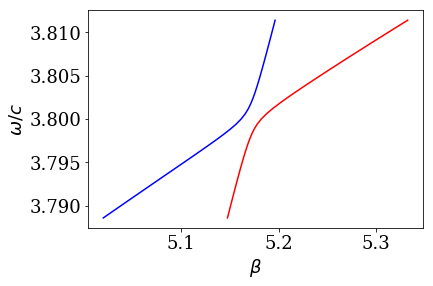

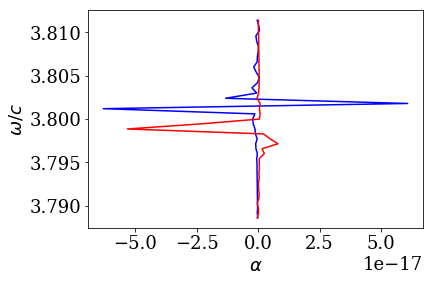

In [78]:
## do not run this part when simulating scattering. it may change some variables used later.

N = 20
N_branch = 2
_w_0_ = 1.0*w_1
_w_p1_ = 1.003*w_1
_w_m1_ = 0.997*w_1
_w_s_ = np.concatenate((np.linspace(_w_m1_, _w_0_, N, endpoint=False), np.linspace(_w_0_, _w_p1_, N, endpoint=True)))
_k_s_ = np.zeros((N_branch, 2*N), dtype=complex)

_k_inds_last_ = np.array([15, 16], dtype=int)
_k_last_ = np.zeros(N_branch, dtype=complex)
for i in range(N_branch):
    _k_last_[i] = eig_points_k_p[_k_inds_last_[i]]
print(_k_inds_last_, _k_last_)
_k_last_0 = np.copy(_k_last_)
#np.set_printoptions(precision=8)

for i in range(N, 2*N):
    _A_mat_list_ = set_matrices_list(_w_s_[i], Ns)
    _A_eqs_list_ = [_A_mat_list_]
    
    [eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
    [eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
    [eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m] = get_eig_points(_w_s_[i], Ns, _N_pp, _A_eqs_list_, False)

    for j in range(N_branch):
        _k_last_j = _k_last_[j]
        _ind_closest_ = np.argmin(np.abs(eig_points_k-_k_last_j))
        
        _k_s_[j,i] = eig_points_k[_ind_closest_]
        _k_last_[j] = _k_s_[j,i]
        eig_points_k[_ind_closest_] = 1.0e100
    print(_w_s_[i], _k_last_)

_k_last_ = _k_last_0
for i in range(N-1, -1, -1):
    _A_mat_list_ = set_matrices_list(_w_s_[i], Ns)
    _A_eqs_list_ = [_A_mat_list_]
    
    [eig_points_k, eig_points_w, eig_vecs_E, eig_vecs_H], \
    [eig_points_k_p, eig_points_w_p, eig_vecs_E_p, eig_vecs_H_p], \
    [eig_points_k_m, eig_points_w_m, eig_vecs_E_m, eig_vecs_H_m] = get_eig_points(_w_s_[i], Ns, _N_pp, _A_eqs_list_, False)

    for j in range(N_branch):
        _k_last_j = _k_last_[j]
        _ind_closest_ = np.argmin(np.abs(eig_points_k-_k_last_j))
        
        _k_s_[j,i] = eig_points_k[_ind_closest_]
        _k_last_[j] = _k_s_[j,i]
        eig_points_k[_ind_closest_] = 1.0e100
    print(_w_s_[i], _k_last_)

    
_c_ = ['b', 'r', 'g']
for j in range(N_branch):
    plot(np.real(_k_s_[j]), _w_s_, color=_c_[j])
xlabel(r'$\beta$')
ylabel(r'$\omega/c$')
savefig(os.path.join(dir_name, 'dispersion-crossing-sub-real' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()        

for j in range(N_branch):
    plot(np.imag(_k_s_[j]), _w_s_, color=_c_[j])
xlabel(r'$\alpha$')
ylabel(r'$\omega/c$')
savefig(os.path.join(dir_name, 'dispersion-crossing-sub-imag' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()        



### scattering (continued)

In [20]:
##check linear dependence
"""
E0_E1 = eig_vecs_E_p[0]/np.roll(eig_vecs_E_p[1], np.argmax(np.abs(eig_vecs_E_p[0]))-np.argmax(np.abs(eig_vecs_E_p[1])))
plot(np.log10(np.abs(eig_vecs_E_p[0])))
plot(np.log10(np.abs(E0_E1)))
ylim([-10, 5])
grid()
"""


def check_linear_dependence(vbose=False):
    if vbose:
        print(eig_vecs_E_p[0].shape)
    _small_ = 1.0e-10
    n_elem = eig_vecs_E_p[0].shape[0]

    linearly_dep =[]

    for i in range(len(eig_points_k_p)):
        E_i = (np.abs(eig_vecs_E_p[i])>_small_*np.linalg.norm(eig_vecs_E_p[i]))*eig_vecs_E_p[i]
        E_i_nnz = (E_i!=0.0)
        s_i = np.argmax(np.abs(E_i))
        for j in range(i+1, len(eig_points_k_p)):
            E_j = (np.abs(eig_vecs_E_p[j])>_small_*np.linalg.norm(eig_vecs_E_p[j]))*eig_vecs_E_p[j]

            E_j_max_inds = np.abs(E_j)>0.9*np.max(np.abs(E_j))
            s_j_list = [_i_ for _i_ in range(len(E_j_max_inds)) if E_j_max_inds[_i_]==1]

            for s_j in s_j_list:
                E_j_s = np.roll(E_j, s_i-s_j)

                E_j_nnz = (E_j_s!=0.0)
                E_ij_nnz = np.logical_and(E_i_nnz, E_j_nnz)

                Ei_Ejs = np.nan_to_num(E_ij_nnz*(E_i/E_j_s))
                Ei_Ejs_max = Ei_Ejs[np.argmax(np.abs(Ei_Ejs))]
                #print(Ei_Ejs)

                if abs(Ei_Ejs_max)>0.0:
                    norm_p = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) - (Ei_Ejs/Ei_Ejs_max))
                    norm_m = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) + (Ei_Ejs/Ei_Ejs_max))

                    assert not np.isnan(norm_p)
                    assert not np.isnan(norm_m)

                    if min([norm_p, norm_m])<1.0e-5:
                        found = False
                        for k in range(len(linearly_dep)):
                            if i in linearly_dep[k]:
                                if j not in linearly_dep[k]:
                                    linearly_dep[k].append(j)
                                found = True
                        if not found:
                            linearly_dep.append([i, j])
                        break

    if vbose:
        print('linearly_dep: ', linearly_dep)

    ind_remove = []
    for i in range (len(linearly_dep)):
        ld_sorted = sorted(linearly_dep[i])
        ind_remove.extend(ld_sorted[1:])

    if vbose:
        print('To remove: ', ind_remove)

    ind_remove = sorted(list(set(ind_remove)), reverse=True)
    for i in range(len(ind_remove)):
        del eig_points_k_p[ind_remove[i]]
        del eig_points_w_p[ind_remove[i]]
        del eig_vecs_E_p[ind_remove[i]]
        del eig_vecs_H_p[ind_remove[i]]


    if vbose:
        print('eig_points_k_p : ', eig_points_k_p)
        print(len(eig_points_k_p))

    ###-----------
    if vbose:
        print('-'*50)
    linearly_dep =[]

    for i in range(len(eig_points_k_m)):
        E_i = (np.abs(eig_vecs_E_m[i])>_small_*np.linalg.norm(eig_vecs_E_m[i]))*eig_vecs_E_m[i]
        E_i_nnz = (E_i!=0.0)
        s_i = np.argmax(np.abs(E_i))
        for j in range(i+1, len(eig_points_k_m)):
            E_j = (np.abs(eig_vecs_E_m[j])>_small_*np.linalg.norm(eig_vecs_E_m[j]))*eig_vecs_E_m[j]

            E_j_max_inds = np.abs(E_j)>0.9*np.max(np.abs(E_j))
            s_j_list = [_i_ for _i_ in range(len(E_j_max_inds)) if E_j_max_inds[_i_]==1]

            for s_j in s_j_list:
                E_j_s = np.roll(E_j, s_i-s_j)

                E_j_nnz = (E_j_s!=0.0)
                E_ij_nnz = np.logical_and(E_i_nnz, E_j_nnz)

                Ei_Ejs = np.nan_to_num(E_ij_nnz*(E_i/E_j_s))
                Ei_Ejs_max = Ei_Ejs[np.argmax(np.abs(Ei_Ejs))]
                #print(Ei_Ejs)

                if abs(Ei_Ejs_max)>0.0:
                    norm_p = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) - (Ei_Ejs/Ei_Ejs_max))
                    norm_m = np.linalg.norm(E_ij_nnz*(np.ones(n_elem)) + (Ei_Ejs/Ei_Ejs_max))

                    assert not np.isnan(norm_p)
                    assert not np.isnan(norm_m)

                    if min([norm_p, norm_m])<1.0e-5:
                        found = False
                        for k in range(len(linearly_dep)):
                            if i in linearly_dep[k]:
                                if j not in linearly_dep[k]:
                                    linearly_dep[k].append(j)
                                found = True
                        if not found:
                            linearly_dep.append([i, j])
                        break

    if vbose:
        print('linearly_dep: ', linearly_dep)

    ind_remove = []
    for i in range (len(linearly_dep)):
        ld_sorted = sorted(linearly_dep[i])
        ind_remove.extend(ld_sorted[1:])

    if vbose:
        print('To remove: ', ind_remove)

    ind_remove = sorted(list(set(ind_remove)), reverse=True)
    for i in range(len(ind_remove)):
        del eig_points_k_m[ind_remove[i]]
        del eig_points_w_m[ind_remove[i]]
        del eig_vecs_E_m[ind_remove[i]]
        del eig_vecs_H_m[ind_remove[i]]


    if vbose:
        print('eig_points_k_m : ', eig_points_k_m)
        print(len(eig_points_k_m))

check_linear_dependence(vbose=True)


(128,)
linearly_dep:  []
To remove:  []
eig_points_k_p :  [(-41.507844878314103+3.2463237313354275e-24j), (-38.662950305898264-9.9509167760650358e-19j), (-35.816889033111011-1.5321176700033319e-21j), (-32.96934468424363-1.9115199184725941e-19j), (-30.119872811319031-1.0425258320881676e-20j), (-27.267827404543198-2.0078891429643535e-23j), (-24.412229124895259+2.1754538646165572e-21j), (-21.551511938886769-2.5352688070524931e-23j), (-18.682990061491456-4.4962385522428863e-19j), (-15.801592704589737-3.6798969778897587e-20j), (-12.896300711155147+1.3333776228999411e-21j), (-9.9370594773510579-1.4332735074040787e-18j), (-6.7961227925493866-2.0631567926119849e-21j), (-2.4528064283806863+9.0143350084786089e-21j), (1.0633173646479097+5.0937424938997056e-20j), (5.1717330327447675-0.0070273081346950853j), (5.1717330327447675+0.0070273081346950827j), (8.8772325807228611+7.8382749219705485e-22j), (11.917249905675096+5.7847669689106337e-19j), (14.850128489119482-2.6430828710977384e-20j), (17.744474

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in true_divide


linearly_dep:  []
To remove:  []
eig_points_k_m :  [(-60.71349077092313-1.0076668524986465e-20j), (-57.146035495725208-6.0025099147036658e-22j), (-53.577872756815616+5.3533276708725679e-20j), (-50.008845807469925+7.6297708393157878e-22j), (-46.43874724751138-3.9264575322284129e-21j), (-42.867296457118663+3.5372715639803986e-22j), (-39.29410359880125+1.9775653308164422e-19j), (-35.718609685167976-2.7877604942949178e-24j), (-32.139981496877425-1.2212866618934795e-21j), (-28.556915141346-1.8981819939711929e-21j), (-24.96723762798603+2.1183299012618578e-18j), (-21.367007093169651+2.8143800433318737e-20j), (-17.748154781750522+2.4816149569113307e-18j), (1.0867688971602993-1.1838816165726014j), (-14.090769501622754-2.4532349130273749e-19j), (-10.326245099490972-1.2110919141753991e-18j), (-5.8961679820338961+1.9418714832733151e-20j), (-5.1718056815790412-1.9756364677750432e-20j), (-0.33881072686332564+9.3518364933384962e-22j), (3.9018032280899644-1.4534914876283895e-20j), (1.0867688971602991+

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in multiply


n:1.3609822655981698  n_0:1.3609822655981698  n_1:2.300505251623567


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:70: RuntimeWarning: overflow encountered in exp


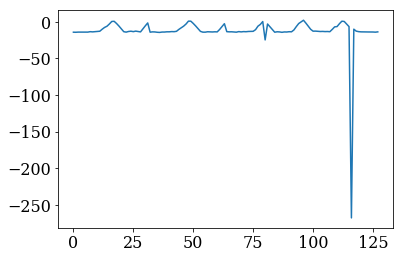

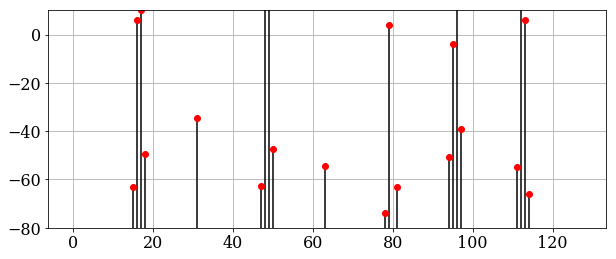

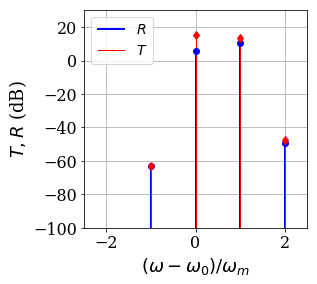

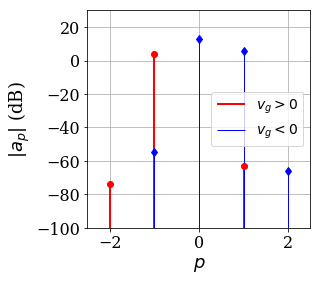

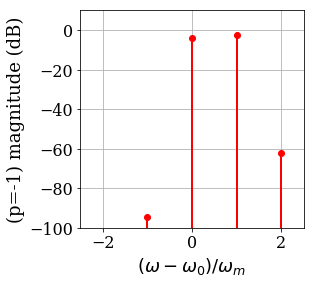

[ -2.82718164e-10 -1.34357641e-10j   2.92324304e-08 +1.37845021e-08j
   1.70228972e-05 +7.89314785e-06j   5.86986104e-01 +2.70046279e-01j
   3.18544002e-01 -6.93578705e-01j   3.27526294e-04 -7.15858026e-04j]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


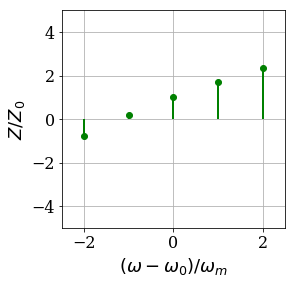

ind_mode_show_p: 15
[-0.79567459-0.00125729j  0.16978710+0.00024808j  0.99999807+0.00135879j
  1.72151862+0.00218606j  2.35438182+0.00280602j]
15 (5.17173303274-0.0070273081347j)


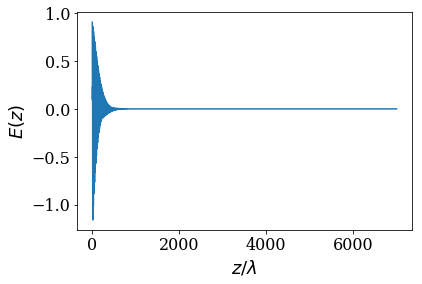


 eig_points_k_p:  [(-16, (-41.507844878314103+3.2463237313354275e-24j)), (-15, (-38.662950305898264-9.9509167760650358e-19j)), (-14, (-35.816889033111011-1.5321176700033319e-21j)), (-13, (-32.96934468424363-1.9115199184725941e-19j)), (-12, (-30.119872811319031-1.0425258320881676e-20j)), (-11, (-27.267827404543198-2.0078891429643535e-23j)), (-10, (-24.412229124895259+2.1754538646165572e-21j)), (-9, (-21.551511938886769-2.5352688070524931e-23j)), (-8, (-18.682990061491456-4.4962385522428863e-19j)), (-7, (-15.801592704589737-3.6798969778897587e-20j)), (-6, (-12.896300711155147+1.3333776228999411e-21j)), (-5, (-9.9370594773510579-1.4332735074040787e-18j)), (-4, (-6.7961227925493866-2.0631567926119849e-21j)), (-3, (-2.4528064283806863+9.0143350084786089e-21j)), (-2, (1.0633173646479097+5.0937424938997056e-20j)), (-1, (5.1717330327447675-0.0070273081346950853j)), (0, (5.1717330327447675+0.0070273081346950827j)), (1, (8.8772325807228611+7.8382749219705485e-22j)), (2, (11.917249905675096+5.78

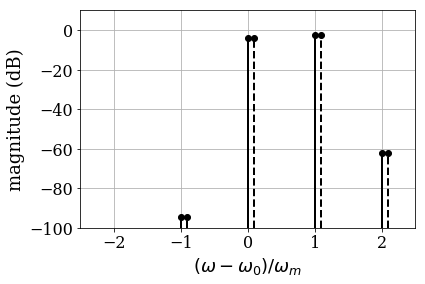

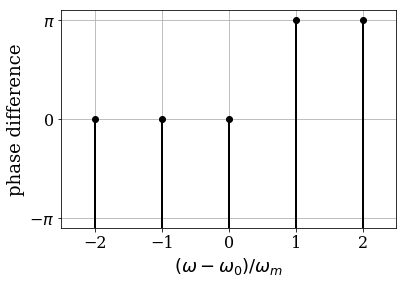

In [23]:
## slab

n = np.real(np.sqrt(1.0+X_ee(w_i)))
lambda_g = 2.0*np.pi/(w_i*n)

z_0 = 0.0     ## later assumed z_0=0
z_1 = 7000.0*lambda_g
n_0 = n
n_1 = n/0.59160146

_n_h_ = 2 #number of harmonics to plot

print('n:{}  n_0:{}  n_1:{}'.format(n, n_0, n_1))

w_Er = None 
_N_2 = Ns[0]

def solveSlab(Ns, w_i, z_0, z_1, vbose=False):
    global w_Er
    _N_2 = Ns[0]
    
    N_mode_p = len(eig_points_k_p)
    N_mode_m = len(eig_points_k_m)
    if N_mode_p>N_mode_m:
        for i in range(N_mode_p-N_mode_m):
            del eig_points_k_p[-1]
            del eig_points_w_p[-1]
            del eig_vecs_E_p[-1]
            del eig_vecs_H_p[-1]
    elif N_mode_m>N_mode_p:
        for i in range(N_mode_m-N_mode_p):
            del eig_points_k_m[-1]
            del eig_points_w_m[-1]
            del eig_vecs_E_m[-1]
            del eig_vecs_H_m[-1]

    N_mode_p = len(eig_points_k_p)
    N_mode_m = len(eig_points_k_m)

    assert N_mode_p==N_mode_m

    N_mode = int((N_mode_p + N_mode_m)/2)
    N_mode_2 = int(N_mode/2)
    w_Er = np.array([w_i+(i-N_mode_2)*d_wc for i in range(N_mode)])   ## reflected and transmitted frequencies
    if vbose:
        print('w_Er: ', w_Er)

    Hr_Er_w = -n_0*np.ones(N_mode)    ## H_r(w)/E_r(w)
    Ht_Et_w = n_1*np.ones(N_mode)    ## H_t(w)/E_t(w)
    Ei_w = np.zeros(N_mode); Ei_w[N_mode_2]=1.0
    Hi_Ei_w = n_0*np.ones(N_mode) 
    Hi_w = Hi_Ei_w*Ei_w
    if vbose:
        print('Hr_Er: ', Hr_Er_w)
        print('Ei   : ', Ei_w)
        print('Hi   : ', Hi_w)

    __big_expo__ = 600
    k_arr = np.array([(i-_N_2)*d_k for i in range(2*_N_2)])
    e_jkpd = [None]*N_mode_p
    for i in range(N_mode_p):
        arg = -1j*(eig_points_k_p[i]+k_arr)*(z_1-z_0)
        e_jkpd[i] = np.exp(arg)
        is_inf = np.isinf(e_jkpd[i])
        e_jkpd[i][is_inf] = 0.0
        e_jkpd[i] = e_jkpd[i]*np.logical_not(is_inf) + np.ones(len(arg))*np.exp(__big_expo__)*is_inf
    e_jkmd = [None]*N_mode_m
    for i in range(N_mode_m):
        arg = -1j*(eig_points_k_m[i]+k_arr)*(z_1-z_0)
        e_jkmd[i] = np.exp(arg)
        is_inf = np.isinf(e_jkmd[i])
        e_jkmd[i][is_inf] = 0.0
        e_jkmd[i] = e_jkmd[i]*np.logical_not(is_inf) + np.ones(len(arg))*np.exp(__big_expo__)*is_inf
            
    assert not (np.any(np.isnan(e_jkpd)) or  np.any(np.isinf(e_jkpd)))
    assert not (np.any(np.isnan(e_jkmd)) or  np.any(np.isinf(e_jkmd)))
            
    A = np.zeros((4*N_mode, 4*N_mode), dtype=complex)
    rhs = np.zeros(4*N_mode, dtype=complex)

    ind_r = lambda w_i: w_i
    ind_t = lambda w_i: w_i+N_mode
    ind_sp = lambda w_i: w_i+2*N_mode
    ind_sm = lambda w_i: w_i+3*N_mode
    ind_iw_sp = lambda w_i: i_w-N_mode_2+_N_2
    ind_iw_sm = lambda w_i: i_w-N_mode_2+_N_2

    for i_w in range(N_mode):  ## iterate over frequencies
        A[ind_r(i_w), ind_r(i_w)] = -1.0
        A[ind_t(i_w), ind_t(i_w)] =  1.0
        A[ind_sp(i_w), ind_r(i_w)] = -Hr_Er_w[i_w]
        A[ind_sm(i_w), ind_t(i_w)] =  Ht_Et_w[i_w]

        rhs[ind_r(i_w)] = Ei_w[i_w]
        rhs[ind_sp(i_w)] = Hi_w[i_w]
        for i_m in range(N_mode): ## iterate over modes
            if d_wc!=0.0:
                #left wall E_left(w_i) = E_right(w_i)
                A[ind_r(i_w), ind_sp(i_m)] =  eig_vecs_E_p[i_m][ind_iw_sp(i_w)]
                A[ind_r(i_w), ind_sm(i_m)] =  eig_vecs_E_m[i_m][ind_iw_sm(i_w)]
                #right wall E_left(w_i) = E_right(w_i)
                A[ind_t(i_w), ind_sp(i_m)] =  -(eig_vecs_E_p[i_m]*e_jkpd[i_m])[ind_iw_sp(i_w)]
                A[ind_t(i_w), ind_sm(i_m)] =  -(eig_vecs_E_m[i_m]*e_jkmd[i_m])[ind_iw_sm(i_w)]

                #left wall H_left(w_i) = H_right(w_i)
                A[ind_sp(i_w), ind_sp(i_m)] =  eig_vecs_H_p[i_m][ind_iw_sp(i_w)]
                A[ind_sp(i_w), ind_sm(i_m)] =  eig_vecs_H_m[i_m][ind_iw_sm(i_w)]
                #right wall H_left(w_i) = H_right(w_i)
                A[ind_sm(i_w), ind_sp(i_m)] =  -(eig_vecs_H_p[i_m]*e_jkpd[i_m])[ind_iw_sp(i_w)]
                A[ind_sm(i_w), ind_sm(i_m)] =  -(eig_vecs_H_m[i_m]*e_jkmd[i_m])[ind_iw_sm(i_w)]
            else:
                #left wall E_left(w_i) = E_right(w_i)
                A[ind_r(i_w), ind_sp(i_m)] =  np.sum(eig_vecs_E_p[i_m])
                A[ind_r(i_w), ind_sm(i_m)] =  np.sum(eig_vecs_E_m[i_m])
                #right wall E_left(w_i) = E_right(w_i)
                A[ind_t(i_w), ind_sp(i_m)] =  -np.sum(eig_vecs_E_p[i_m]*e_jkpd[i_m])
                A[ind_t(i_w), ind_sm(i_m)] =  -np.sum(eig_vecs_E_m[i_m]*e_jkmd[i_m])

                #left wall H_left(w_i) = H_right(w_i)
                A[ind_sp(i_w), ind_sp(i_m)] =  np.sum(eig_vecs_H_p[i_m])
                A[ind_sp(i_w), ind_sm(i_m)] =  np.sum(eig_vecs_H_m[i_m])
                #right wall H_left(w_i) = H_right(w_i)
                A[ind_sm(i_w), ind_sp(i_m)] =  -np.sum(eig_vecs_H_p[i_m]*e_jkpd[i_m])
                A[ind_sm(i_w), ind_sm(i_m)] =  -np.sum(eig_vecs_H_m[i_m]*e_jkmd[i_m])

    #print('A: \n', A)
    #print('rhs: ', rhs)
    #print('eig_vecs_E_p: ', eig_vecs_E_p)
    #print('ind_iw_sp(i_w)', ind_iw_sp(0))    

    x = np.linalg.solve(A, rhs)

    if vbose:
        print('|x|: ', np.abs(x))
    return x

x = solveSlab(Ns, w_i, z_0, z_1)
assert len(x)%4==0
N_mode = int(len(x)/4)
N_mode_2 = int(N_mode/2)


font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

x = x*(np.abs(x)>0.0) + 1.0e-200*(np.abs(x)==0.0)
plot(np.log10(np.abs(x)))
show()

figsize(10, 4)
plot(np.arange(4*N_mode), 20*np.log10(np.abs(x)), 'ro')
vlines(np.arange(4*N_mode), -100*np.ones(4*N_mode), (20*np.log10(np.abs(x))))
ylim([-80, 10.0])
grid()
show()

excitation_from_right_side = False
#if phi>0.0:
#    excitation_from_right_side = True
    
figsize(4, 4)
w_scaled = (w_Er-w_i)/abs(d_wc)
x_R = x[0:N_mode]
x_T = x[N_mode:2*N_mode]
plot(w_scaled, 20*np.log10(np.abs(x_R)), 'bo')
plot(w_scaled, 20*np.log10(np.abs(x_T)), 'rd')
vlines(w_scaled, -100*np.ones(N_mode), (20*np.log10(np.abs(x_R))), linewidth=2, color='b', label='$R$')
vlines(w_scaled, -100*np.ones(N_mode), (20*np.log10(np.abs(x_T))), linewidth=1, color='r', label='$T$')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
ylabel(r'$T, R$ (dB)', fontsize=18)
xlim([-_n_h_-0.5, _n_h_+0.5])
ylim([-80, 30.0])
xticks(np.arange(-_n_h_, _n_h_+1, 2))
yticks(np.arange(-100, 30, 20))
legend(loc='best', fontsize=14)
grid()
savefig(os.path.join(dir_name, 'lorentz-disp-slab-RT' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


k_scaled = np.arange(N_mode)-N_mode_2
x_SP = x[2*N_mode:3*N_mode]
x_SM = x[3*N_mode:4*N_mode]
if excitation_from_right_side:
    k_scaled = -k_scaled
    x_SP = x[3*N_mode:4*N_mode]
    x_SM = x[2*N_mode:3*N_mode]
plot(k_scaled, 20*np.log10(np.abs(x_SP)), 'ro')
plot(k_scaled, 20*np.log10(np.abs(x_SM)), 'bd')
vlines(k_scaled, -100*np.ones(N_mode), 20*np.log10(np.abs(x_SP)), linewidth=2, color='r', label=r'$v_g>0$')
vlines(k_scaled, -100*np.ones(N_mode), 20*np.log10(np.abs(x_SM)), linewidth=1, color='b', label=r'$v_g<0$')
xlabel(r'$p$', fontsize=18)
ylabel(r'$|a_p|$ (dB)', fontsize=18)
xlim([-_n_h_-0.5, _n_h_+0.5])
ylim([-80, 30.0])
xticks(np.arange(-_n_h_, _n_h_+1, 2))
yticks(np.arange(-100, 30, 20))
legend(loc='best', fontsize=14)
grid()
savefig(os.path.join(dir_name, 'lorentz-disp-slab-modes' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()


ind_mode_show_p = -1 + N_mode_2
eig_vecs_E_p_show = eig_vecs_E_p[ind_mode_show_p]
plot(np.arange(-_N_2, _N_2)*np.sign(d_wc), 20*np.log10(np.abs(eig_vecs_E_p_show)), 'ro')
vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc), -100*np.ones(N_mode), 20*np.log10(np.abs(eig_vecs_E_p_show)), linewidth=2, color='r')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
ylabel(r'(p={}) magnitude (dB)'.format(ind_mode_show_p-N_mode_2), fontsize=18)
xlim([-_n_h_-0.5, _n_h_+0.5])
ylim([-100, 10])
xticks(np.arange(-_n_h_, _n_h_+1, 2))
yticks(np.arange(-100, 10, 20))
grid()
savefig(os.path.join(dir_name, 'lorentz-disp-slab-harmonics' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

print(eig_vecs_E_p_show[_N_2-3:_N_2+3])


eig_vecs_H_p_show = eig_vecs_H_p[ind_mode_show_p]
plot(np.arange(-_N_2, _N_2)*np.sign(d_wc), eig_vecs_E_p_show/eig_vecs_H_p_show*n, 'go')
vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc), 0*np.ones(N_mode), eig_vecs_E_p_show/eig_vecs_H_p_show*n, linewidth=2, color='g')
xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
ylabel(r'$Z/Z_0$', fontsize=18)
xlim([-_n_h_-0.5, _n_h_+0.5])
ylim([-5, 5])
xticks(np.arange(-_n_h_, _n_h_+1, 2))
#yticks(np.arange(-100, 10, 20))
grid()
savefig(os.path.join(dir_name, 'lorentz-disp-slab-harmimpedance' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

print('ind_mode_show_p:', ind_mode_show_p)
print((eig_vecs_E_p_show/eig_vecs_H_p_show*n)[_N_2-2:_N_2+3])


figsize(6, 4)

z = np.linspace(z_0, max(60*lambda_g, z_1), 2000)
k_p_show = eig_points_k_p[ind_mode_show_p]
print(ind_mode_show_p, k_p_show)
E_mode = np.zeros(len(z), dtype=complex)
for m in range(-_N_2, _N_2):
    E_mode += eig_vecs_E_p_show[m+_N_2]*np.exp(-1j*(k_p_show+m*d_k)*z)
plot(z/lambda_g, np.real(E_mode))
xlabel(r'$z/\lambda$', fontsize=18)
ylabel(r'$E(z)$', fontsize=18)
#xticks(np.arange(0, 30, 10))
#yticks(np.arange(-1, 2, 1))
savefig(os.path.join(dir_name, 'lorentz-disp-slab-mode-profile' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()
#print('k_p: ', k_p_show, 'd_k :', d_k)
#print(eig_vecs_E_p_show)

np.savez(os.path.join(dir_name, 'lorentz-disp-slab-RT'), x_R=x_R, x_T=x_T, w_scaled=w_scaled, w_i=w_i, d_wc=d_wc, d_k=d_k)


print('\n eig_points_k_p: ', list(zip(k_scaled, eig_points_k_p)))
print('\n eig_points_k_m: ', list(zip(k_scaled, eig_points_k_m)))

compare_modes = True
if compare_modes:
    __d_ = 0.1
    ind_mode_show_p_arr = [0 + N_mode_2, -1 + N_mode_2]
    ind_mode_show_p = ind_mode_show_p_arr[0]
    eig_vecs_E_p_show = eig_vecs_E_p[ind_mode_show_p]
    plot(np.arange(-_N_2, _N_2)*np.sign(d_wc), 20*np.log10(np.abs(eig_vecs_E_p_show)), 'ko')
    vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc), -100*np.ones(N_mode), 20*np.log10(np.abs(eig_vecs_E_p_show)), linewidth=2, color='k')
    ind_mode_show_p = ind_mode_show_p_arr[1]
    eig_vecs_E_p_show = eig_vecs_E_p[ind_mode_show_p]
    plot(np.arange(-_N_2, _N_2)*np.sign(d_wc)+__d_, 20*np.log10(np.abs(eig_vecs_E_p_show)), 'ko')
    vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc)+__d_, -100*np.ones(N_mode), 20*np.log10(np.abs(eig_vecs_E_p_show)), linewidth=2, color='k', linestyle='--')
    xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
    ylabel(r'magnitude (dB)', fontsize=18)
    xlim([-_n_h_-0.5, _n_h_+0.5])
    ylim([-100, 10])
    xticks(np.arange(-_n_h_, _n_h_+1, 1))
    yticks(np.arange(-100, 10, 20))
    grid()
    savefig(os.path.join(dir_name, 'modes-harmonics-abs' + file_ext), bbox_inches='tight', pad_inches=0.2)
    show()

    harmonics_phase_diff = (np.angle(eig_vecs_E_p[ind_mode_show_p_arr[0]]) - np.angle(eig_vecs_E_p[ind_mode_show_p_arr[1]]))
    plot(np.arange(-_N_2, _N_2)*np.sign(d_wc), harmonics_phase_diff, 'ko')
    vlines(np.arange(-_N_2, _N_2)*np.sign(d_wc), -2.0*np.pi*np.ones(N_mode), harmonics_phase_diff, linewidth=2, color='k')
    xlabel(r'$(\omega-\omega_0)/\omega_m$', fontsize=18)
    ylabel(r'phase difference', fontsize=18)
    xlim([-_n_h_-0.5, _n_h_+0.5])
    ylim([-1.1*np.pi, 1.1*np.pi])
    xticks(np.arange(-_n_h_, _n_h_+1, 1))
    yticks([-np.pi, 0, np.pi], [r'$-\pi$', r'0', r'$\pi$'])
    grid()
    savefig(os.path.join(dir_name, 'modes-harmonics-phase' + file_ext), bbox_inches='tight', pad_inches=0.2)
    show()




/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:70: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


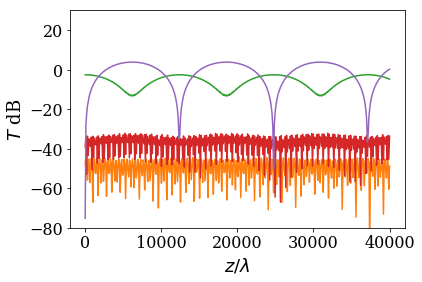

In [42]:

N = 400
z_1_arr = np.linspace(1.0, 40000.0, N)*lambda_g
x_R = [None]*N
x_T = [None]*N
N_mode, N_mode_2 = None, None
for i in range(N):
    z_1 = z_1_arr[i]
    x = solveSlab(Ns, w_i, z_0, z_1)
    assert len(x)%4==0
    N_mode = int(len(x)/4)
    N_mode_2 = int(N_mode/2)

    x = x*(np.abs(x)>0.0) + 1.0e-200*(np.abs(x)==0.0)
    
    x_R[i] = x[0:N_mode]
    x_T[i] = x[N_mode:2*N_mode]

for i in range(N_mode_2-2,N_mode_2+3):
    x_T_i = [x_T[j][i] for j in range(N)]
    plot(z_1_arr/lambda_g, 20.0*np.log10(x_T_i))
ylim([-80, 30])
xlabel(r'$z/\lambda$', fontsize=18)
ylabel(r'$T$ dB', fontsize=18)
#xticks(np.arange(0, 30, 10))
#yticks(np.arange(-1, 2, 1))
savefig(os.path.join(dir_name, 'lorentz-disp-slab-modes-length' + file_ext), bbox_inches='tight', pad_inches=0.2)
show()

Populating the interactive namespace from numpy and matplotlib


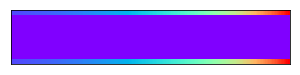

In [66]:
%pylab inline
import matplotlib.cm as cm

N = 200
kzp = 5+0.1j
kzm = 5-0.1j
alpha = 5.0

figsize(5, 1)

z = np.linspace(0, 8, N)
ap1, ap2, am1, am2 = 1.0, 1.0, 1.0, 1.0

w = np.linspace(0, 1.0, 50, endpoint=True) 

Z, W = np.meshgrid(z, w)

Fzp1 = ap1*np.exp(+Z/alpha)*np.exp(-1j*kzp*Z)*(np.logical_and(W>=0.0, W<=0.1))
Fzp2 = ap1*np.exp(+Z/alpha)*np.exp(-1j*kzp*Z)*(np.logical_and(W>=0.9, W<=1.0))

Fzp = Fzp1 + Fzp2

pcolor(Z, W, np.abs(Fzp), cmap=cm.rainbow)

xticks([])
yticks([])

show()


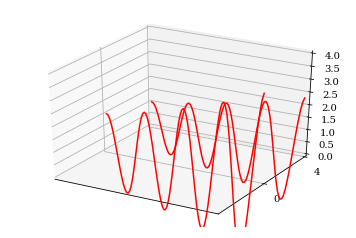

In [74]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

figsize(6,4)

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
N = 100
kx=5.0
sigma = 6.0
a0, a1, a2, a3 = 1.5, 1.0, 1.0, 1.0
x = 0.5*np.linspace(0.0, 10.0, N)
y0 = 0.0*np.ones(N)
zp0 = a0*np.exp(+x/sigma)*np.cos(kx*x)
ax.plot(x, y0, zp0, color='r')

y1 = 4.0*np.ones(N)
zp1 = a1*np.exp(+x/sigma)*np.cos(kx*x)
ax.plot(x, y1, zp1, color='r')

#zm0 = a2*np.exp(-x/sigma)*np.cos(kx*x)
#ax.plot(x, y0, zm0, color='b')

#zm1 = a3*np.exp(-x/sigma)*np.cos(kx*x)
#ax.plot(x, y1, zm1, color='b')

#ax.plot(x, y0, 2*(z0-z2), color='k')
#ax.plot(x, y1, z1-z3, color='k')

#ax.legend()
plt.ylim([-1, 2])
ax.set_xlim3d(0, 5) 
ax.set_ylim3d(-4, 4) 
ax.set_zlim3d(0, 4) 
plt.xticks([])
plt.yticks([0, 4])
#plt.zticks([])

plt.show()

Populating the interactive namespace from numpy and matplotlib


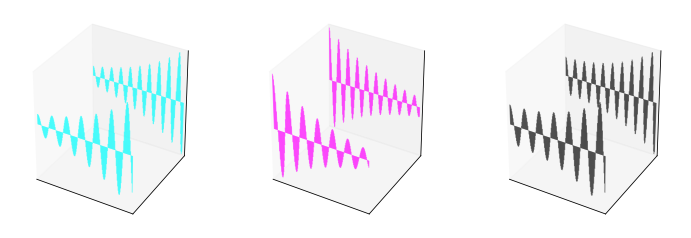

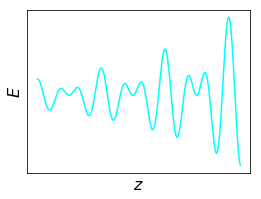

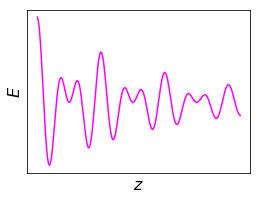

In [20]:
%pylab inline
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


figsize(12, 4)

N = 200
alpha = 6
kp0, kp1 = 4.0, 6.0

z = np.linspace(0, 10, N)
fp0 = np.exp(+z/alpha)*np.cos(kp0*z)
fp1 = np.exp(+z/alpha)*np.cos(kp1*z)

fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')

c_f1 = np.array([0, 255, 255])/255
c_f2 = c_f1
ax.bar(left=z, height=fp0, zs=0, zdir='y', width=0.1, color=c_f1, alpha=0.5)
ax.bar(left=z, height=fp1, zs=10, zdir='y', width=0.1, color=c_f2, alpha=0.5)

ax.set_xlim3d(0, 10) 
ax.set_ylim3d(0, 10) 
#ax.set_zlim3d(-10, 10) 
plt.xticks([])
plt.yticks([])
ax.set_zticks([])

ax = fig.add_subplot(132, projection='3d')

fm0 = np.exp(-z/alpha)*np.cos(kp0*z)
fm1 = np.exp(-z/alpha)*np.cos(kp1*z)

c_f1 = np.array([255, 0, 255])/255
c_f2 = c_f1
ax.bar(left=z, height=fm0, zs=0, zdir='y', width=0.1, color=c_f1, alpha=0.5)
ax.bar(left=z, height=fm1, zs=10, zdir='y', width=0.1, color=c_f2, alpha=0.5)

ax.set_xlim3d(0, 10) 
ax.set_ylim3d(0, 10) 
#ax.set_zlim3d(-10, 10) 
plt.xticks([])
plt.yticks([])
ax.set_zticks([])

ax = fig.add_subplot(133, projection='3d')

fm0 = np.exp(-z/alpha)*np.cos(kp0*z)
fm1 = np.exp(-z/alpha)*np.cos(kp1*z)

c_f1 = np.array([10, 10, 10])/255
c_f2 = c_f1
ax.bar(left=z, height=fp0+fm0, zs=0, zdir='y', width=0.1, color=c_f1, alpha=0.5)
ax.bar(left=z, height=fp1+fm1, zs=10, zdir='y', width=0.1, color=c_f2, alpha=0.5)

ax.set_xlim3d(0, 10) 
ax.set_ylim3d(0, 10) 
#ax.set_zlim3d(-10, 10) 
plt.xticks([])
plt.yticks([])
ax.set_zticks([])

savefig(os.path.join(dir_name, 'conc-superlum-profile' + file_ext), bbox_inches='tight', pad_inches=0.2)

plt.show()


figsize(4, 3)

plt.plot(z, fp0+fp1, color=np.array([0, 255, 255])/255)
xticks([])
yticks([])
xlabel('$z$', fontsize=16)
ylabel('$E$', fontsize=16)
savefig(os.path.join(dir_name, 'conc-superlum-E-tot-grow' + file_ext), bbox_inches='tight', pad_inches=0.2)
plt.show()

plt.plot(z, fm0+fm1, color=np.array([255, 0, 255])/255)
xticks([])
yticks([])
xlabel('$z$', fontsize=16)
ylabel('$E$', fontsize=16)
savefig(os.path.join(dir_name, 'conc-superlum-E-tot-decay' + file_ext), bbox_inches='tight', pad_inches=0.2)
plt.show()


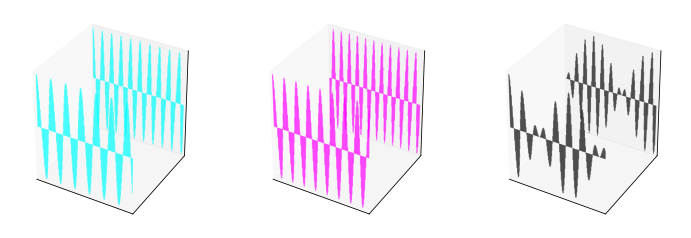

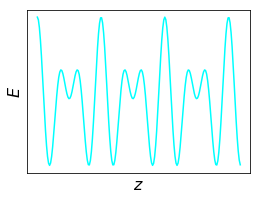

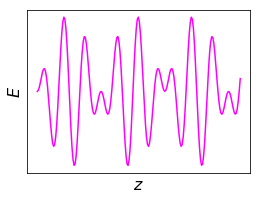

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

figsize(12, 4)

N = 200
alpha = 6
kp0, kp1 = 4.0, 6.0

z = np.linspace(0, 10, N)
fp0 = np.cos(kp0*z)
fp1 = np.cos(kp1*z)

fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
c_f1 = np.array([0, 255, 255])/255
c_f2 = c_f1
ax.bar(left=z, height=fp0, zs=0, zdir='y', width=0.1, color=c_f1, alpha=0.5)
ax.bar(left=z, height=fp1, zs=10, zdir='y', width=0.1, color=c_f2, alpha=0.5)

ax.set_xlim3d(0, 10) 
ax.set_ylim3d(0, 10) 
#ax.set_zlim3d(-10, 10) 
plt.xticks([])
plt.yticks([])
ax.set_zticks([])

ax = fig.add_subplot(132, projection='3d')
km0, km1 = 5.0, 7.0
fm0 = np.cos(km0*z)
fm1 = -np.cos(km1*z)

c_f1 = np.array([255, 0, 255])/255
c_f2 = c_f1
ax.bar(left=z, height=fm0, zs=0, zdir='y', width=0.1, color=c_f1, alpha=0.5)
ax.bar(left=z, height=fm1, zs=10, zdir='y', width=0.1, color=c_f2, alpha=0.5)

ax.set_xlim3d(0, 10) 
ax.set_ylim3d(0, 10) 
#ax.set_zlim3d(-10, 10) 
plt.xticks([])
plt.yticks([])
ax.set_zticks([])

ax = fig.add_subplot(133, projection='3d')

c_f1 = np.array([10, 10, 10])/255
c_f2 = c_f1
ax.bar(left=z, height=fp0+fm0, zs=0, zdir='y', width=0.1, color=c_f1, alpha=0.5)
ax.bar(left=z, height=fp1+fm1, zs=10, zdir='y', width=0.1, color=c_f2, alpha=0.5)

ax.set_xlim3d(0, 10) 
ax.set_ylim3d(0, 10) 
#ax.set_zlim3d(-10, 10) 
plt.xticks([])
plt.yticks([])
ax.set_zticks([])

savefig(os.path.join(dir_name, 'conc-sublum-profile' + file_ext), bbox_inches='tight', pad_inches=0.2)

plt.show()


figsize(4, 3)

plt.plot(z, fp0+fp1, color=np.array([0, 255, 255])/255)
xticks([])
yticks([])
xlabel('$z$', fontsize=16)
ylabel('$E$', fontsize=16)
savefig(os.path.join(dir_name, 'conc-sublum-E-tot-grow' + file_ext), bbox_inches='tight', pad_inches=0.2)
plt.show()

plt.plot(z, fm0+fm1, color=np.array([255, 0, 255])/255)
xticks([])
yticks([])
xlabel('$z$', fontsize=16)
ylabel('$E$', fontsize=16)
savefig(os.path.join(dir_name, 'conc-sublum-E-tot-decay' + file_ext), bbox_inches='tight', pad_inches=0.2)
plt.show()



### evanescent mode

Populating the interactive namespace from numpy and matplotlib


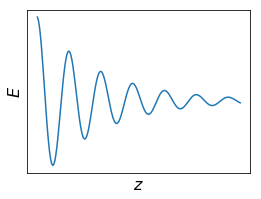

In [1]:
%pylab inline

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


figsize(4, 3)

N = 200
alpha = 3
k = 4.0

z = np.linspace(0, 10, N)
fz = np.exp(-z/alpha)*np.cos(k*z)


plt.plot(z, fz)
xticks([])
yticks([])
xlabel('$z$', fontsize=16)
ylabel('$E$', fontsize=16)

savefig(os.path.join(dir_name, 'evanescent' + file_ext), bbox_inches='tight', pad_inches=0.2)

plt.show()




### instable mode

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


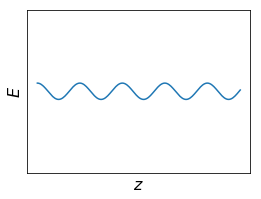

In [10]:
%pylab inline

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
import matplotlib.animation as animation

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'spacetime')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


figsize(4, 3)

N = 200
k = 3
omega = k + 1j

z = np.linspace(0, 10, N)


Nt = 200
t_max = 10*(2*np.pi/np.real(omega))
fig = None
def updateE(i):
    plt.clf()
    t_i = i*t_max/Nt
    fz = np.exp(-1j*(omega*t_i - k*z))
    fig = plt.plot(z, fz)
    ax = plt.gca()
    ax.set_adjustable('box-forced')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    plt.ylim(-10, 10)
    plt.xlabel('$z$', fontsize=16)
    plt.ylabel('$E$', fontsize=16)
    return fig
    
fig = plt.figure()
eps_anim = animation.FuncAnimation(fig, updateE, frames=25, interval=Nt)
eps_anim.save(os.path.join(dir_name, 'instable.mp4'), writer="ffmpeg")
plt.show()




In [2]:
%pwd

'/home/nima/Documents/GitProjects/myPyCodes'